# Тема “Обучение без учителя”
### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
data = boston['data']
target = boston['target']
feature_names = boston['feature_names']

In [6]:
X = pd.DataFrame(data, columns=feature_names)
Y = pd.DataFrame(target)

In [9]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
Y.head()

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [13]:
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

X_train_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1.287702,-0.500320,1.033237,-0.278089,0.489252,-1.428069,1.028015,-0.802173,1.706891,1.578434,0.845343,-0.074337,1.753505
1,-0.336384,-0.500320,-0.413160,-0.278089,-0.157233,-0.680087,-0.431199,0.324349,-0.624360,-0.584648,1.204741,0.430184,-0.561474
2,-0.403253,1.013271,-0.715218,-0.278089,-1.008723,-0.402063,-1.618599,1.330697,-0.974048,-0.602724,-0.637176,0.065297,-0.651595
3,0.388230,-0.500320,1.033237,-0.278089,0.489252,-0.300450,0.591681,-0.839240,1.706891,1.578434,0.845343,-3.868193,1.525387
4,-0.325282,-0.500320,-0.413160,-0.278089,-0.157233,-0.831094,0.033747,-0.005494,-0.624360,-0.584648,1.204741,0.379119,-0.165787
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.387850,-0.500320,-0.352167,-0.278089,-0.310348,-0.677264,0.834884,-0.750355,-0.507797,-0.120700,1.159817,0.430731,0.873419
400,-0.373414,0.364589,-0.584520,-0.278089,-0.786706,-0.649038,-0.946216,0.291651,-0.740922,-1.090773,0.126546,0.353970,0.076412
401,-0.405470,2.959318,-1.303361,-0.278089,-1.033391,0.450354,-1.389703,2.130899,-0.624360,-0.747331,-0.592251,0.379010,-0.910692
402,0.851897,-0.500320,1.033237,-0.278089,1.561057,0.441886,0.931450,-0.790898,1.706891,1.578434,0.845343,-2.694586,1.522570


In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

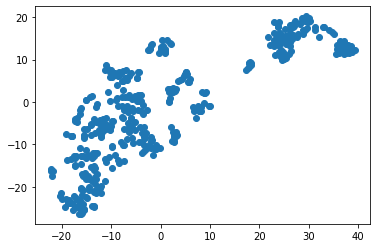

In [19]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [20]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, random_state=42, max_iter=100)

In [34]:
train_labels = model.fit_predict(X_train_scaled)

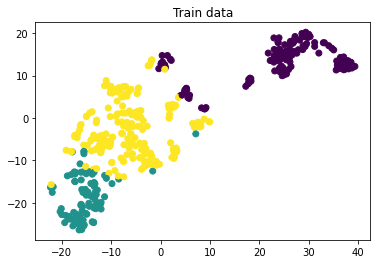

In [28]:
kmeans = KMeans(n_clusters=3)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.title('Train data')

plt.show()

In [31]:
X_train['CRIM'][labels_train == 0].mean(), Y_train[labels_train == 0].mean()

(10.715219062500003,
 0    16.179688
 dtype: float64)

In [32]:
X_train['CRIM'][labels_train == 1].mean(), Y_train[labels_train == 1].mean()

(0.07356558139534886,
 0    27.788372
 dtype: float64)

In [33]:
X_train['CRIM'][labels_train == 2].mean(), Y_train[labels_train == 2].mean()

(0.4221666842105262,
 0    24.994737
 dtype: float64)

### *Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


In [35]:
test_labels = model.predict(X_test_scaled)

In [37]:
X_test['CRIM'][test_labels == 0].mean(), Y_test[test_labels == 0].mean()

(0.26607882352941176,
 0    21.860784
 dtype: float64)

In [38]:
X_test['CRIM'][test_labels == 1].mean(), Y_test[test_labels == 1].mean()

(10.165531142857143,
 0    16.437143
 dtype: float64)

In [39]:
X_test['CRIM'][test_labels == 2].mean(), Y_test[test_labels == 2].mean()

(0.062060000000000004,
 0    31.35
 dtype: float64)

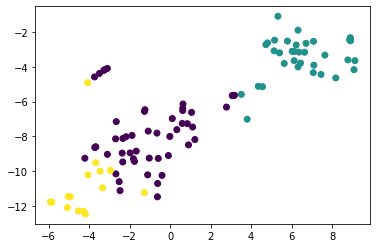

In [42]:
X_test_tsne = tsne.fit_transform(X_test_scaled)



plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=test_labels)

plt.show()

Классно получается, все наконец начинает в голове укладываться) Красиво видно соотношение криминальности района к цене недвижимости 